### Linear Regression Project
#### In this project we will be working with a Fish market data set, indicating the weight of fishs. We will try to create a model that will predict weight in future based of the features of the past weight.
#### This data set contains the following features:
- Species :species name of fish
- Weight : weight of fish in Gram g
- Length1 : vertical length in cm
- Length2 : diagonal length in cm
- Length3 : cross length in cm
- Height : height in cm
- Width : diagonal width in cm

# Gather Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# get the data
df = pd.read_csv(r'Downloads\task\Fish.csv')

# Assess Data

In [3]:
# get the head of the data
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#shape
df.shape

(159, 7)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# columns of the data
for i,col in enumerate(df.columns):
    print(i,col)

0 Species
1 Weight
2 Length1
3 Length2
4 Length3
5 Height
6 Width


In [7]:
# check for nulls
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
# check for duplicated
df.duplicated().sum()

0

In [9]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [10]:
# Get a sample of data
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920
105,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
64,Parkki,120.0,17.5,19.0,21.3,8.3922,2.9181
34,Bream,950.0,38.0,41.0,46.5,17.6235,6.3705
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684


In [11]:
# check species names
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Quality
- The Species columns type need to be category not object

# Clean Data
***The data is clean and doesn't require any fix except convert Species columns type to category***

***Define***
- The Species columns type need to be category not object

**Code**

In [12]:
df.Species = df.Species.astype('category')

**Test**

In [13]:
assert df.Species.dtype == 'category'

# Exploratory Data Analysis

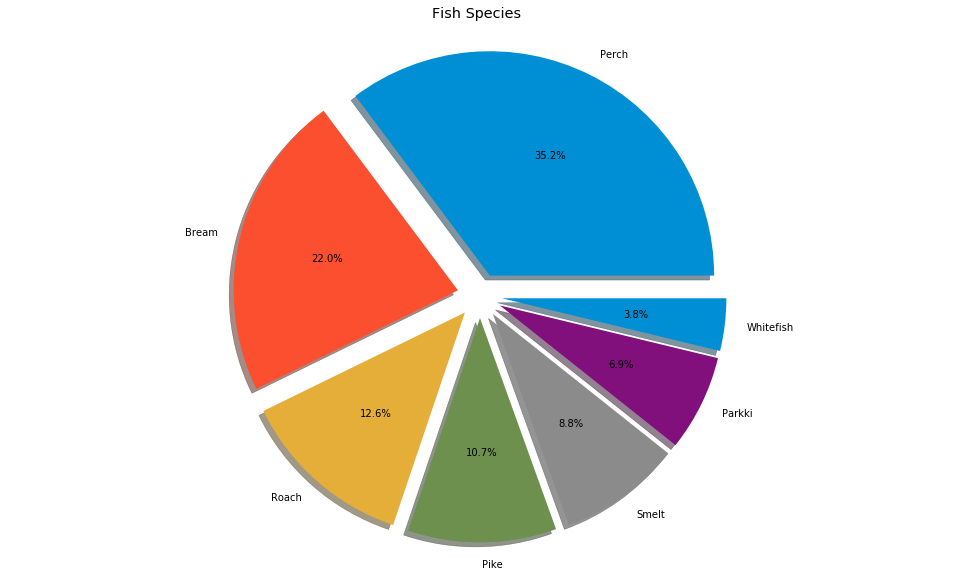

In [14]:
plt.figure(figsize=(15,10))
label=['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish']
plt.pie(df.Species.value_counts(),explode=[0.1]*len(label),labels=label,autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Fish Species')
plt.show()

In [15]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

***The plot show that Perch ,Bream species are the most common and Parkki ,Whitefish are less common***

In [16]:
# create a function to plot a histogram
def plot_hist(col,style):
    g = sns.FacetGrid(df,hue='Species',palette=style,height=6,aspect=2)
    g.map(plt.hist,col,alpha=0.6,bins=20)
    plt.legend()
    plt.show()    

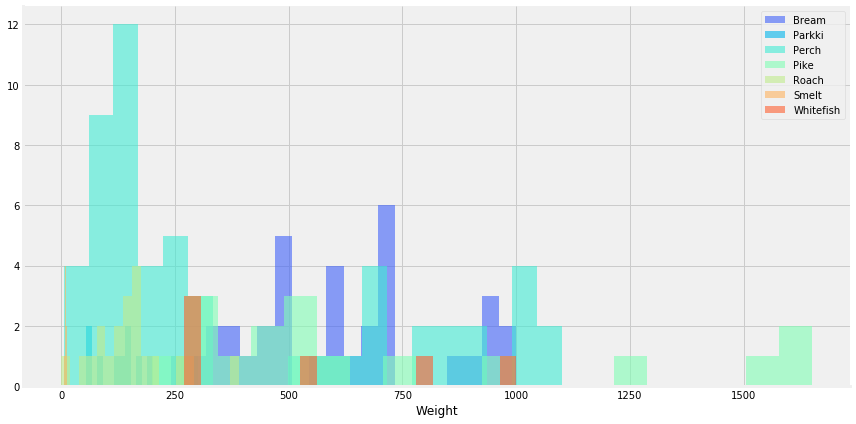

In [17]:
plot_hist('Weight','rainbow')

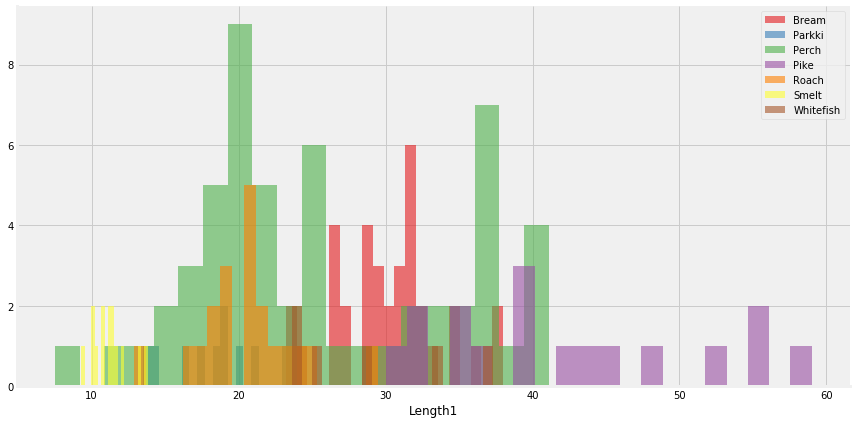

In [18]:
plot_hist('Length1','Set1')

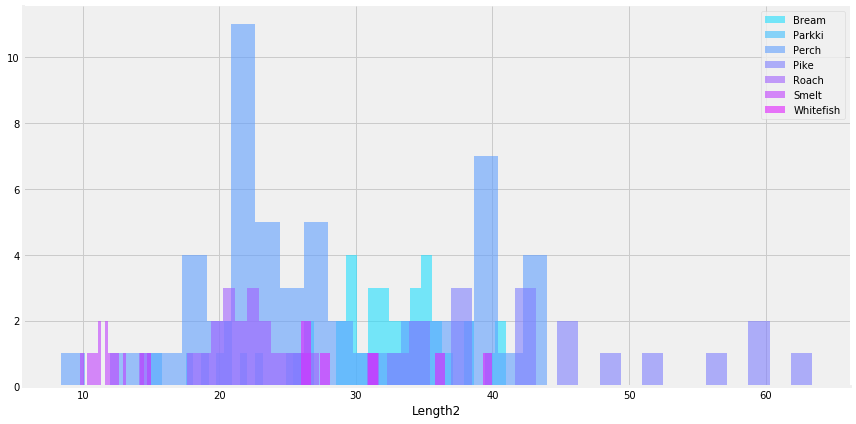

In [19]:
plot_hist('Length2','cool')

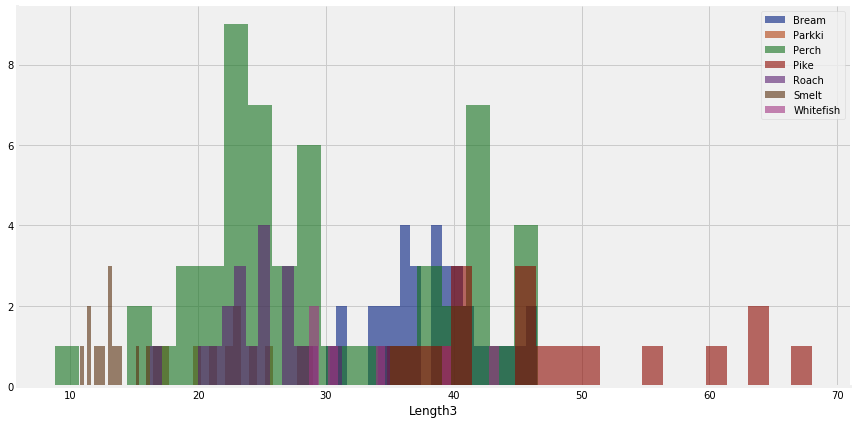

In [20]:
plot_hist('Length3','dark')

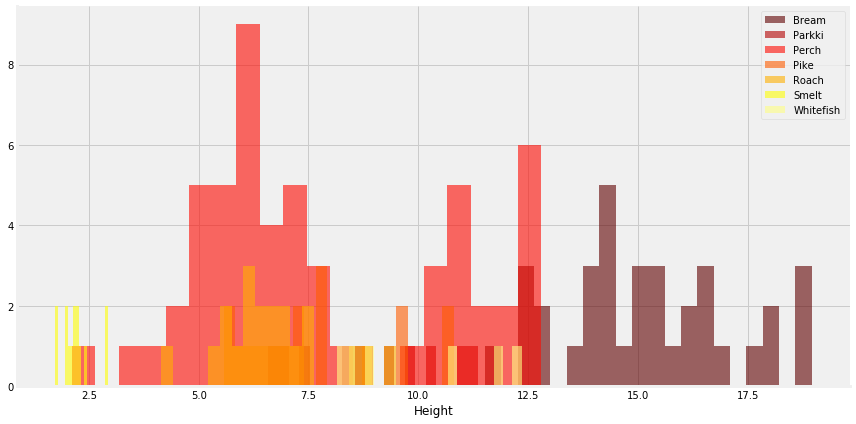

In [21]:
plot_hist('Height','hot')

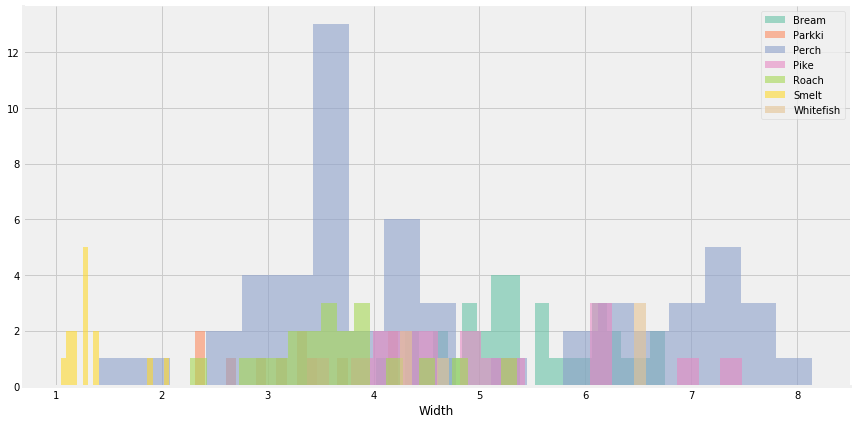

In [22]:
plot_hist('Width','Set2')

In [23]:
# create a function to plot a scatterplot
def plot_scatter(col,style):
    plt.figure(figsize=(12,10))
    sns.scatterplot(data = df,x=col,y='Weight',hue='Species',palette=style)
    plt.xlabel(col)
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

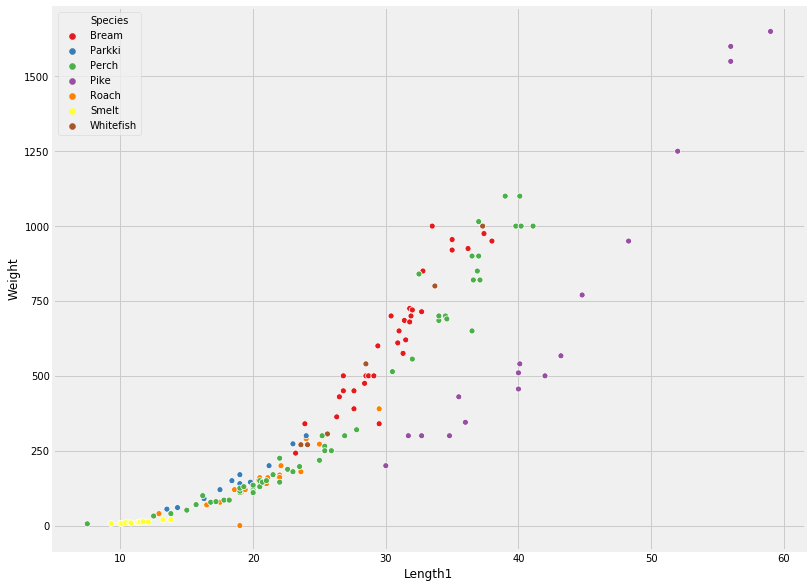

In [24]:
plot_scatter('Length1','Set1')

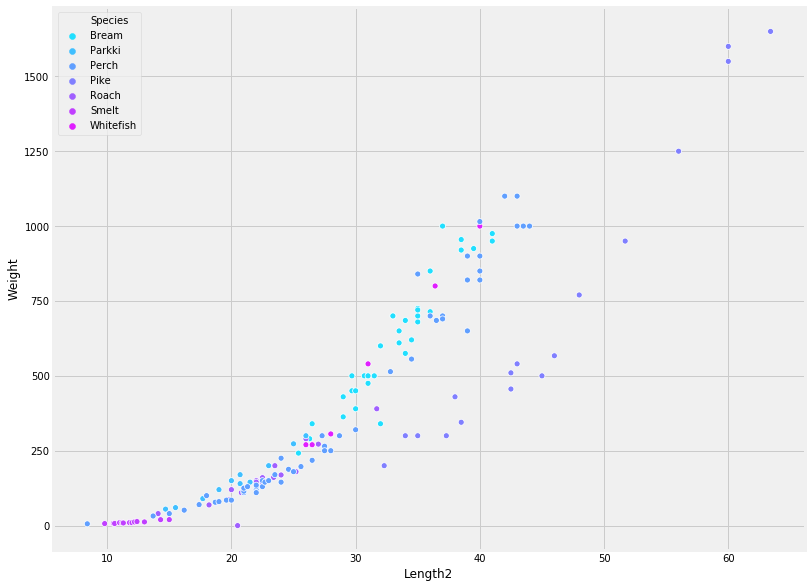

In [25]:
plot_scatter('Length2','cool')

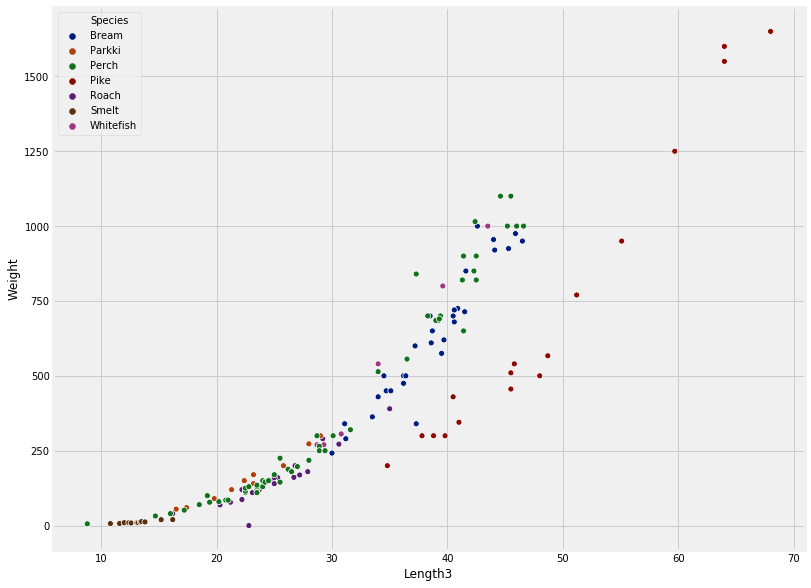

In [26]:
plot_scatter('Length3','dark')

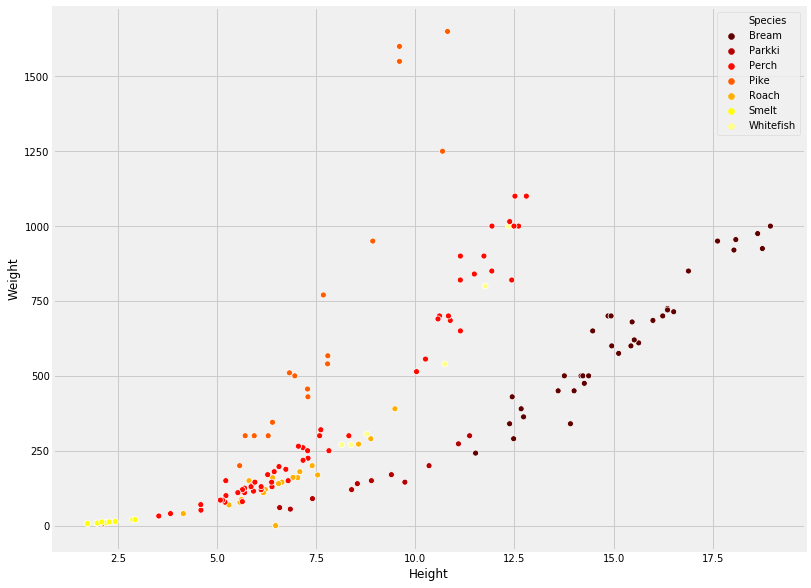

In [27]:
plot_scatter('Height','hot')

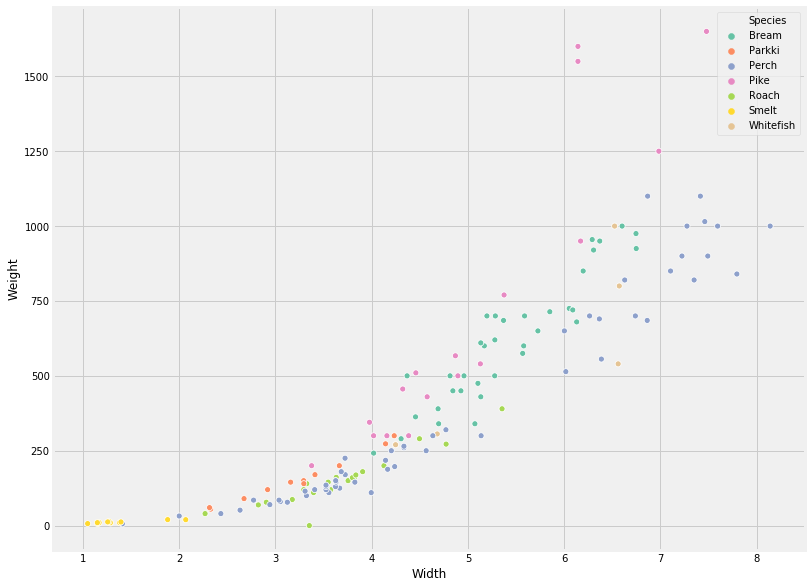

In [28]:
plot_scatter('Width','Set2')

### **The plots show that all feature increasing with the increasing of weight which mean that all fearure are in linear relationship with weight** 

In [29]:
# # create a function to plot a boxplot
def plot_box(col,style):
    plt.figure(figsize=(12,10))
    sns.boxplot(data = df,x='Species',y=col,palette=style)
    plt.ylabel(col)
    plt.xlabel('Species')
    plt.show()

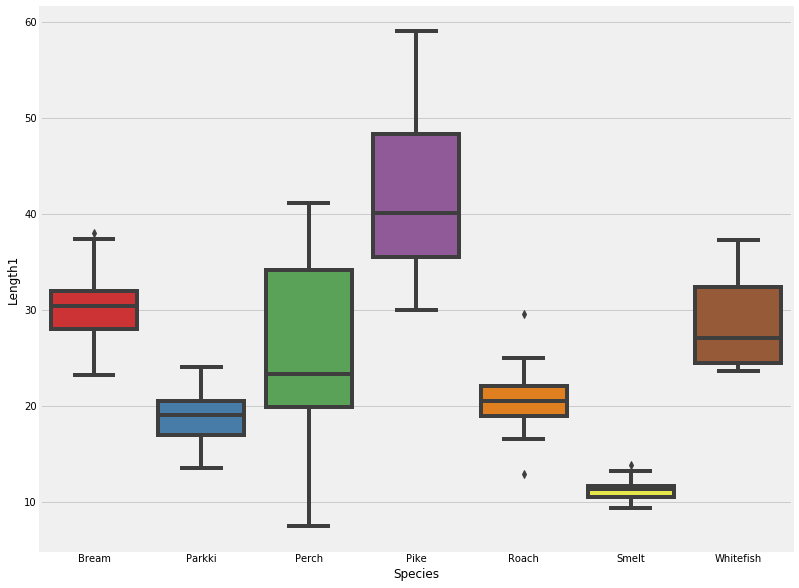

In [30]:
plot_box('Length1','Set1')

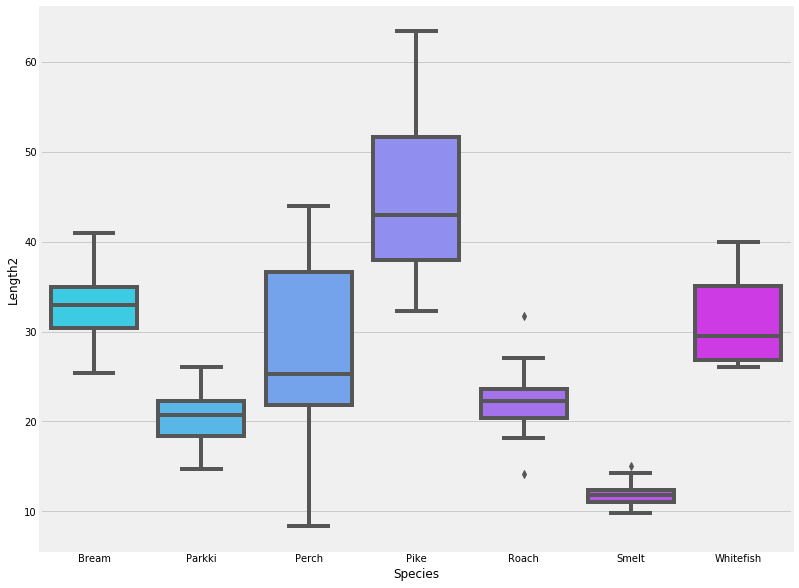

In [31]:
plot_box('Length2','cool')

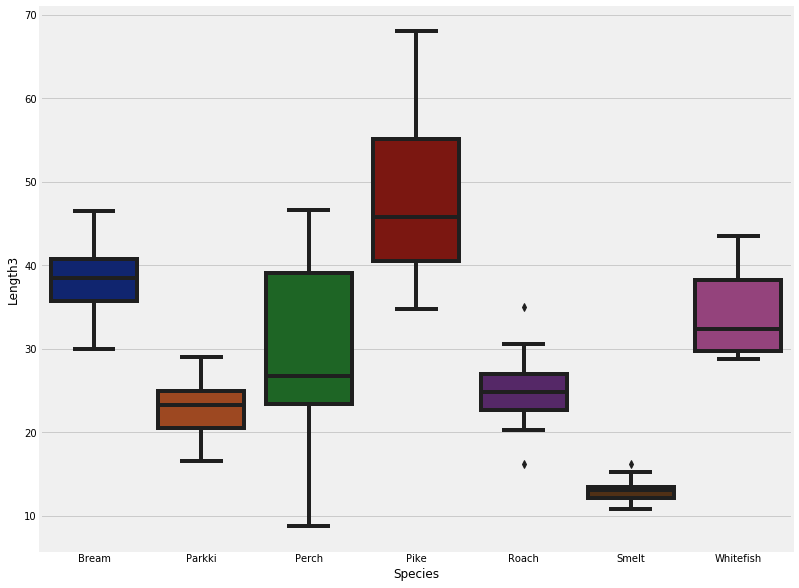

In [32]:
plot_box('Length3','dark')

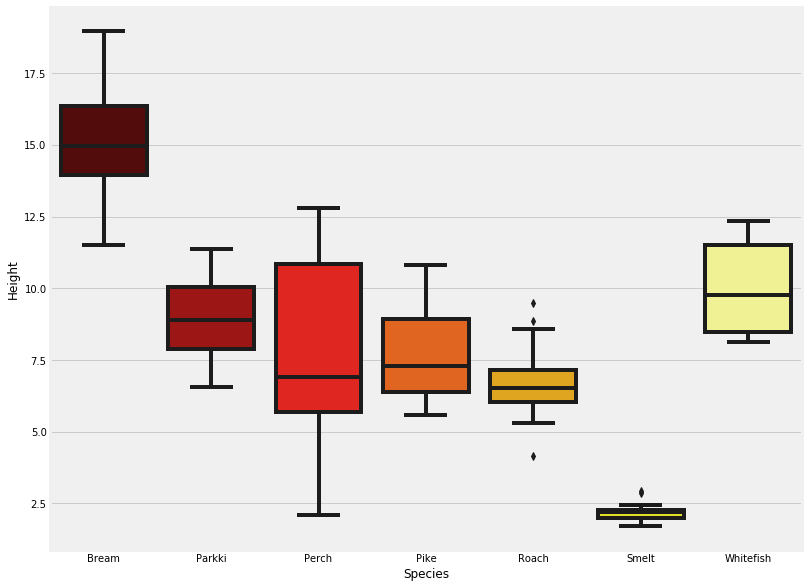

In [33]:
plot_box('Height','hot')

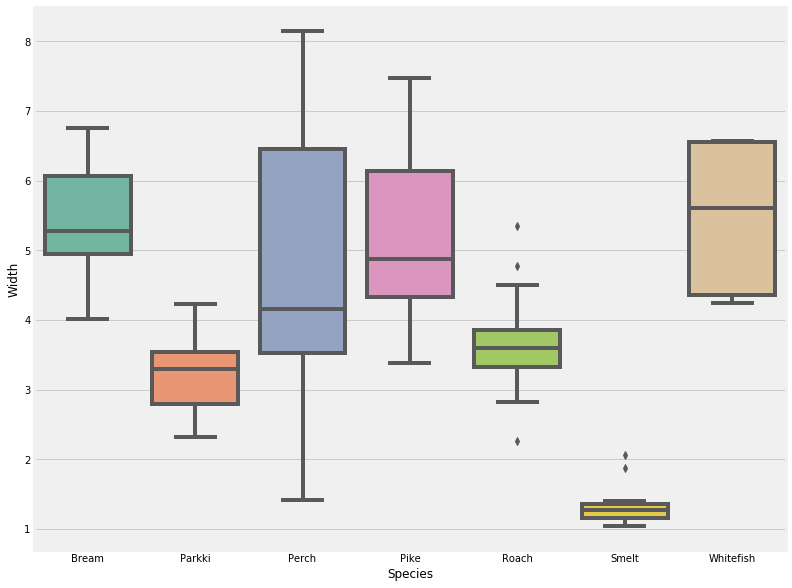

In [34]:
plot_box('Width','Set2')

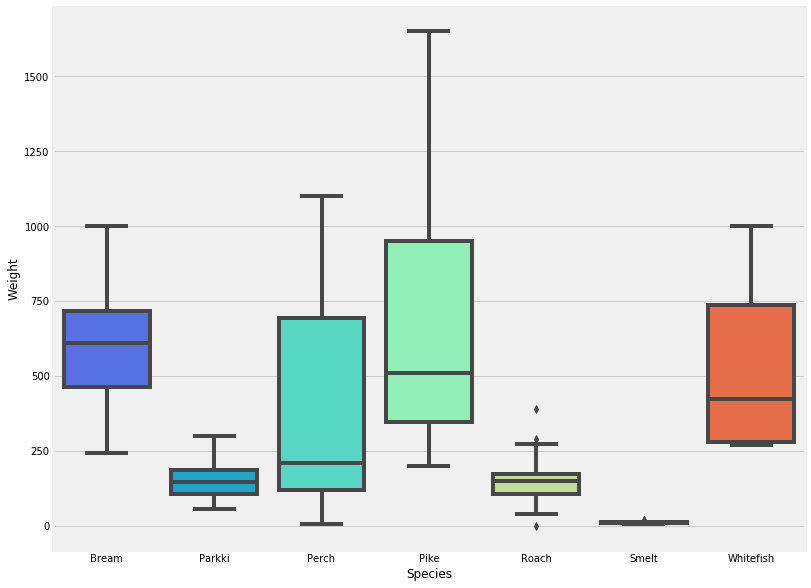

In [35]:
plot_box('Weight','rainbow')

# Prepare The Data For The Model

In [36]:
# convert species column to nnmbers each one represent a specific species
df.Species =df.Species.cat.codes

In [37]:
# indicating the outliers 
df_outlier = df['Weight']
df_outlier_Q1 = df_outlier.quantile(0.25)
df_outlier_Q3 = df_outlier.quantile(0.75)
df_outlier_IQR = df_outlier_Q3 - df_outlier_Q1
df_outlier_lower = df_outlier_Q1 - (1.5 * df_outlier_IQR)
df_outlier_upper = df_outlier_Q3 + (1.5 * df_outlier_IQR)
(df_outlier_lower,df_outlier_upper)

(-675.0, 1445.0)

In [38]:
df.query('Weight >= 1445.0 or Weight <= -675.0')

,Species,Weight,Length1,Length2,Length3,Height,Width
142,3,1600.0,56.0,60.0,64.0,9.600,6.144
143,3,1550.0,56.0,60.0,64.0,9.600,6.144
144,3,1650.0,59.0,63.4,68.0,10.812,7.480


In [39]:
# drop outliers rows
df.drop([142,143,144],axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

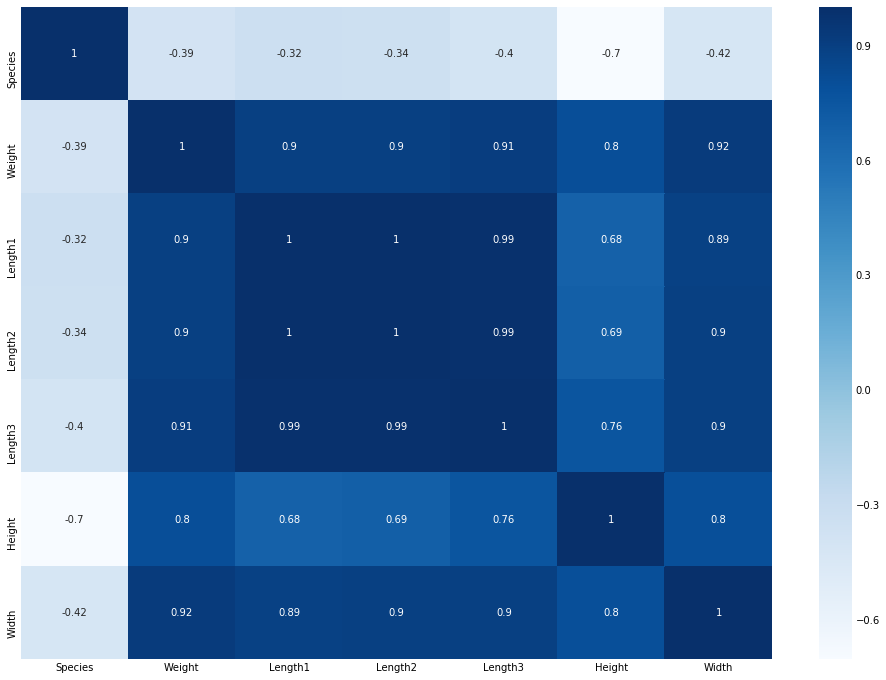

In [40]:
# plot a heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [41]:
# drop species columns because it had negative corrleation with weight
df.drop('Species',axis=1,inplace=True)

In [42]:
# drop Length2 , Length3 columns because it had 1 corrleation with Length1
df.drop(['Length2','Length3'],axis=1,inplace=True)

In [43]:
# get head of data
df.head()

,Weight,Length1,Height,Width
0,242.0,23.2,11.5200,4.0200
1,290.0,24.0,12.4800,4.3056
2,340.0,23.9,12.3778,4.6961
3,363.0,26.3,12.7300,4.4555
4,430.0,26.5,12.4440,5.1340


# Split the data into training set and testing set using train_test_split

In [44]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop('Weight',axis=1)
y = df['Weight']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm=LinearRegression()

***Train and fit a Linear regression model on the training set***

In [49]:
# fit the model to the data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# display intercept
lm.intercept_

-458.4119110728728

In [51]:
# display coefficient
lm.coef_

array([12.65643757, 14.90731643, 86.44832114])

# Predictions and Evaluations

In [52]:
predict = lm.predict(X_test)

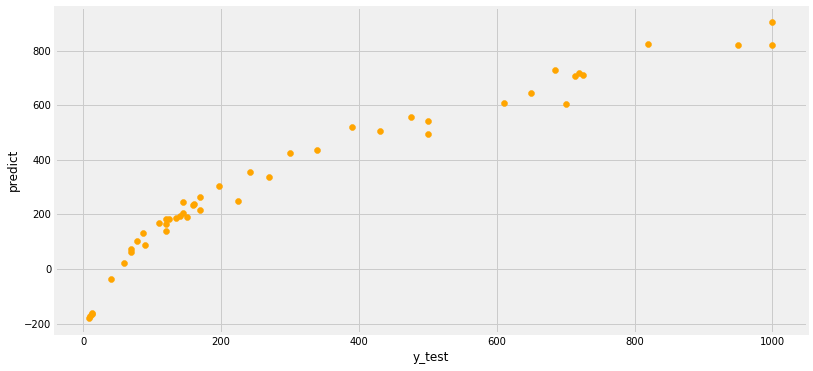

In [53]:
# create a plot for the relation between y_test and the model predicitions
plt.figure(figsize=(12,6))
plt.scatter(y_test,predict,color='orange')
plt.ylabel('predict')
plt.xlabel('y_test')
plt.show()

In [54]:
# import mean_squared_error,r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [55]:
# compute root mean_squared_error
np.sqrt(mean_squared_error(y_test,predict))

86.5668811182846

In [56]:
# compute mean_absolute_error
mean_absolute_error(y_test,predict)

68.27689079110179

In [57]:
# compute r2_score
r2_score(y_test,predict)

0.9104901056079883